# Exploratory Data Analysis - Cancer Data

Analysis and report completed by:

Arjun Chakraborty, Zeliang (Doug) Xu, John Boudreaux

September 24, 2018


## Introduction
* Include Research question
* Include details about data set
* Include any restrictions put upon the data upfront
* Note that this is not causal analysis

This exploratory analysis is meant to address the research question:
_What factors are related to the cancer death rate in US counties?_

To explore this research question, we will employ various statistical techniques including subsetting the data, descriptive statistics, outlier detection and treatment, multivariate correlations, and others. In particular, our analysis will focus heavily on using graphical methods to illustrate various aspects about our dataset.

It is important to note that our analysis is not meant to prove any sort of causality. All of our methods and conclusions are purely meant as descriptive methods to explore the relationships within the data. This dataset also has some very particular issues that indicate further data collection or clarification may be necessary to fully validate the results. For instance, there is no documentation on the basis of the death rate- is this a death rate per 100,000 people, averaged over some period? Is it normalized in any way? Is it only deaths from cancer? Without further documentation, we can still perform some analysis but the full translation into reality is still somewhat unknown.

In this report, we will use R (>=3.4) to perform the analysis. We will provide code for all graphics and analysis performed so that the reader can reproduce this analysis with the given dataset.

## Setup

In [44]:
require(car)
require(dplyr)
require(corrplot)

We start by loading our packages for analysis. The `car` package gives the `scatterplotMatrix` function, which is very useful to see relationships between multiple parameters at the same time. `dplyr` gives some convenient tools for data subsetting and aggregation, but will only have limited use in this report. The `corrplot` package gives the `corrplot` function, which is a nice visual way to see the correlations between data in our dataset.

In [45]:
cancerdata <- read.csv("../project materials/cancer.csv")

We then load our data into R using the read.csv commands. Now that we have our packages and data in our R environment, we can begin our analysis.

## Data Selection
* Include rows, columns
* Include discussion about data types
* Include summary data -> make sure this is not just a "data dump"

In [46]:
dim(cancerdata)

[1] 3047   30

Our data has 3047 observations in rows, and 30 columns of parameters for each observation. 

In [47]:
str(cancerdata)

'data.frame':	3047 obs. of  30 variables:
 $ X                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ avgAnnCount         : num  1397 173 102 427 57 ...
 $ medIncome           : int  61898 48127 49348 44243 49955 52313 37782 40189 42579 60397 ...
 $ popEst2015          : int  260131 43269 21026 75882 10321 61023 41516 20848 13088 843954 ...
 $ povertyPercent      : num  11.2 18.6 14.6 17.1 12.5 15.6 23.2 17.8 22.3 13.1 ...
 $ binnedInc           : Factor w/ 10 levels "(34218.1, 37413.8]",..: 9 6 6 4 6 7 2 2 3 8 ...
 $ MedianAge           : num  39.3 33 45 42.8 48.3 45.4 42.6 51.7 49.3 35.8 ...
 $ MedianAgeMale       : num  36.9 32.2 44 42.2 47.8 43.5 42.2 50.8 48.4 34.7 ...
 $ MedianAgeFemale     : num  41.7 33.7 45.8 43.4 48.9 48 43.5 52.5 49.8 37 ...
 $ Geography           : Factor w/ 3047 levels "Abbeville County, South Carolina",..: 1459 1460 1464 1589 1618 1766 2051 2112 2143 2185 ...
 $ AvgHouseholdSize    : num  2.54 2.34 2.62 2.52 2.34 2.58 2.42 2.24 2.38 2.65 ...
 $ PercentMarri

Our 30 columns are to be primarily demographic data for various counties in the USA.

In [48]:
# binning of the geography into states
cancerdata$Geography <- as.character(cancerdata$Geography)
split.geo <- strsplit(as.character(cancerdata$Geography), ", ")
states <- sapply(split.geo, 
                 function(x){
                   return(x[2])
                   })
cancerdata$state <- as.factor(states)

unique(cancerdata$state)

[1] Washington           West Virginia        Wisconsin           
 [4] Nebraska             Nevada               New Hampshire       
 [7] New Jersey           New Mexico           New York            
[10] Virginia             Michigan             Minnesota           
[13] North Carolina       North Dakota         Alabama             
[16] Arkansas             California           Montana             
[19] Tennessee            Texas                Louisiana           
[22] Maine                Maryland             Massachusetts       
[25] Utah                 Vermont              Colorado            
[28] Wyoming              Mississippi          Missouri            
[31] Kansas               Kentucky             Connecticut         
[34] Delaware             District of Columbia Florida             
[37] Oklahoma             Oregon               Ohio                
[40] Pennsylvania         Rhode Island         South Carolina      
[43] Indiana              Iowa                 Georgia             
[46] Hawaii               Idaho                Illinois            
[49] Alaska               Arizona              South Dakota        
51 Levels: Alabama Alaska Arizona Arkansas California Colorado ... Wyoming

States will be more useful for subsetting

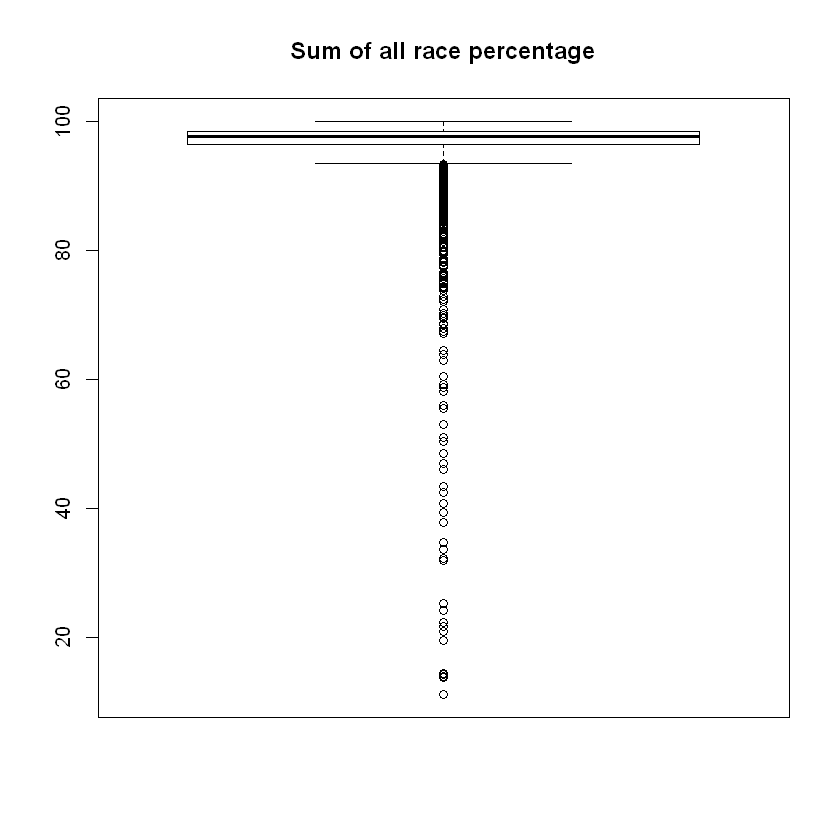

In [57]:
#create logical field to make sure races add up to 100
adds.to.100 <- cancerdata$PctWhite + cancerdata$PctBlack + cancerdata$PctAsian + cancerdata$PctOtherRace
boxplot(adds.to.100, main = "Sum of all race percentage", height = 3, width = 5)

...that's an issue

In [54]:
sum(adds.to.100 < 95)

[1] 421

## Exploratory Analysis
* Include univariate methods (histograms, boxplots, summary stats)
* Include multivariate
* Each code input/output should have discussion as to why it was performed, and what the takeaway is
* Be careful about using the terms "significant" and "probable" as these have strict statistical definitions, and I have a feeling we might get points off if we use them outside of that strict definition.
* State how any subsetting/filtering of the data might affect the overall analysis... i.e., if we get rid of these data points, how might that change our results

## Discussion and Conclusions
* Synthesize material from exploratory analysis into paragraphs
* Discuss further steps that may be useful in the future
